<a href="https://colab.research.google.com/github/TamizharasanG/Travel-and-Tourism-Clarity-TTS/blob/main/Tour_Assistant_Web_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import warnings

warnings.filterwarnings("ignore")

In [142]:
data = pd.read_csv("https://raw.githubusercontent.com/julienjta/Data-Science-Portfolio/main/Project%201/data/dataset.csv",index_col=0)

In [143]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
data.shape

(300153, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


# **EDA**

In [6]:
data["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [7]:
data["flight"].nunique()

1561

In [8]:
data["destination_city"].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [9]:
data["stops"].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [10]:
data["class"].unique()

array(['Economy', 'Business'], dtype=object)

In [11]:
data["days_left"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [12]:
data["airline"].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

**Customer count of each Airlines**

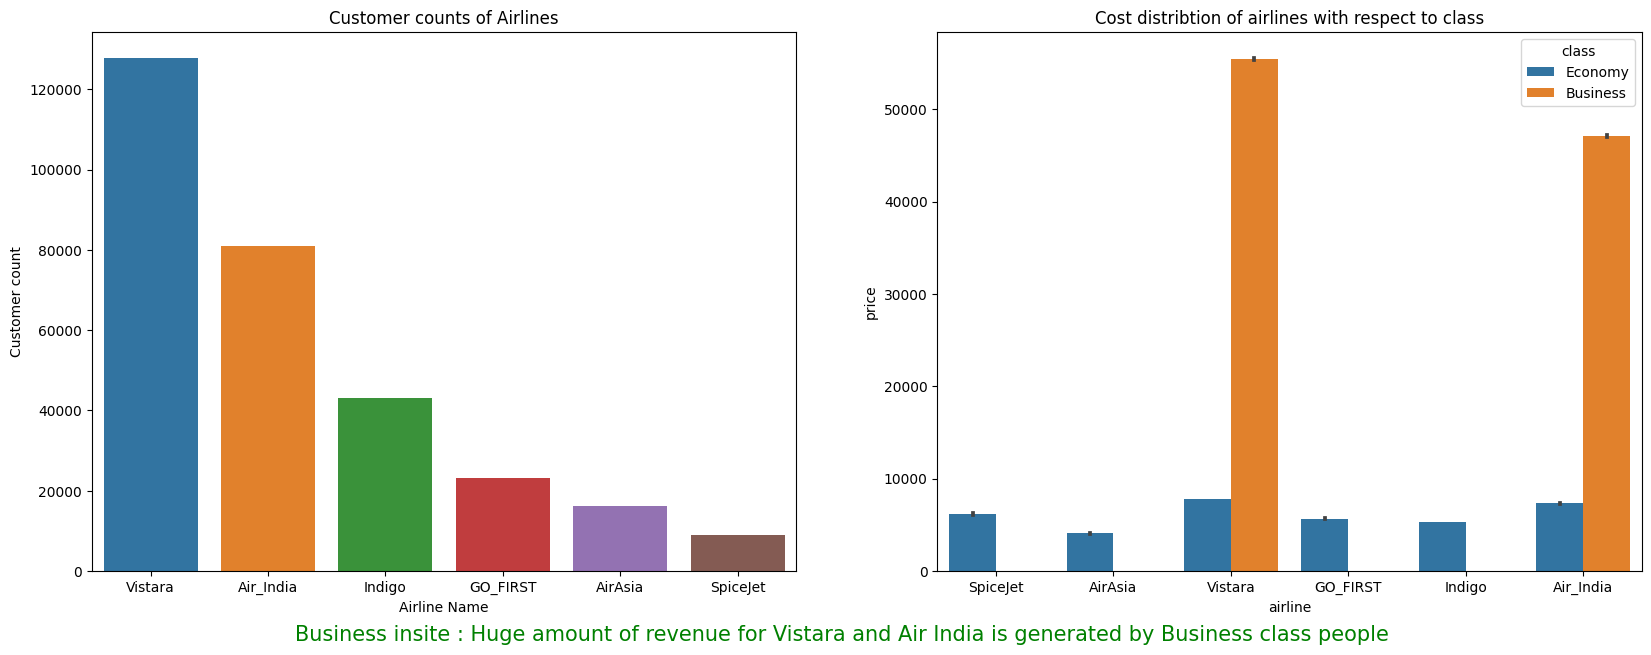

In [13]:
plt.figure(figsize = (20, 7))

plt.subplot(1, 2, 1)
sns.barplot(x = data["airline"].value_counts().index, y = data["airline"].value_counts().tolist())
plt.xlabel("Airline Name")
plt.ylabel("Customer count")
plt.title("Customer counts of Airlines")

plt.subplot(1, 2, 2)
sns.barplot(x = "airline", y = "price",hue = "class" ,data = data)
plt.title("Cost distribtion of airlines with respect to class")

plt.figtext(0.5, 0.01, "Business insite : Huge amount of revenue for Vistara and Air India is generated by Business class people", ha="center", fontsize=15, color = "green")
plt.show()

**Business class customer preferences**

In [14]:
data[data["class"] == "Business"].groupby("airline")["price"].mean()

data[data["class"] == "Business"]["airline"].value_counts()

Vistara      60589
Air_India    32898
Name: airline, dtype: int64

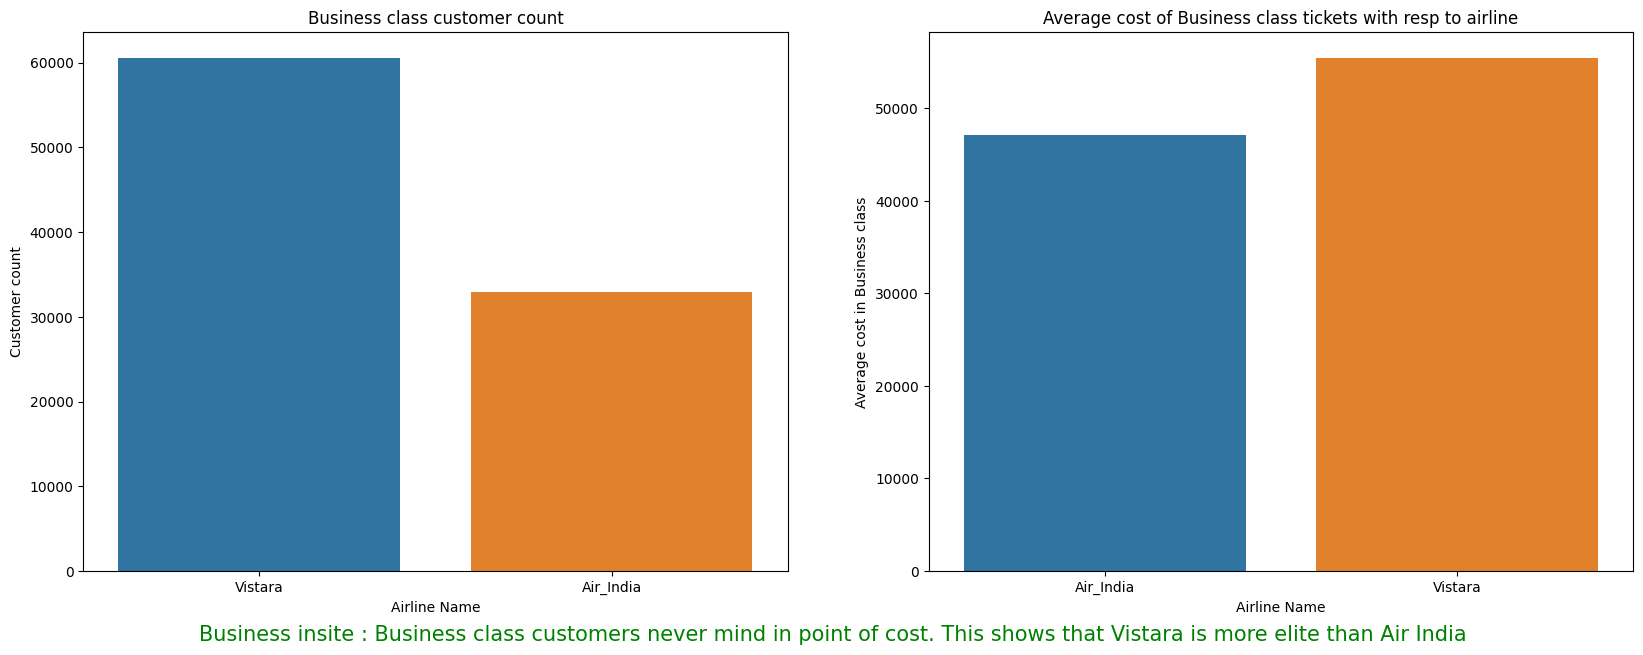

In [15]:
plt.figure(figsize = (20, 7))

plt.subplot(1, 2, 1)
sns.barplot(x = data[data["class"] == "Business"]["airline"].value_counts().index, y =data[data["class"] == "Business"]["airline"].value_counts().tolist())
plt.xlabel("Airline Name")
plt.ylabel("Customer count")
plt.title("Business class customer count")

plt.subplot(1, 2, 2)
sns.barplot(x = data[data["class"] == "Business"].groupby("airline")["price"].mean().index, y = data[data["class"] == "Business"].groupby("airline")["price"].mean().tolist())
plt.xlabel("Airline Name")
plt.ylabel("Average cost in Business class")
plt.title("Average cost of Business class tickets with resp to airline")

plt.figtext(0.5, 0.01, "Business insite : Business class customers never mind in point of cost. This shows that Vistara is more elite than Air India", ha="center", fontsize=15, color = "green")
plt.show()

**Economy class customer preference**

In [16]:
data[data["class"] == "Economy"].groupby("airline")["price"].mean()

data[data["class"] == "Economy"]["airline"].value_counts()

Vistara      67270
Air_India    47994
Indigo       43120
GO_FIRST     23173
AirAsia      16098
SpiceJet      9011
Name: airline, dtype: int64

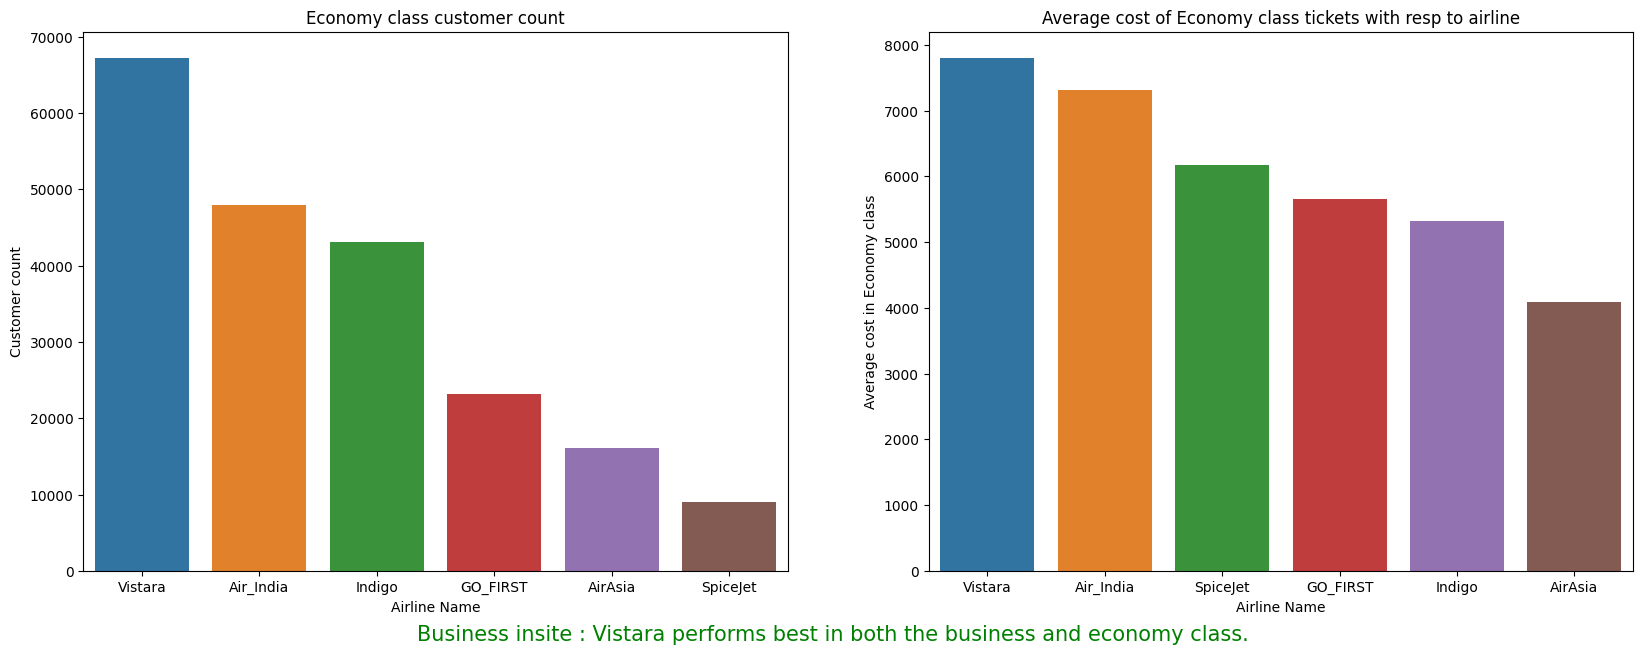

In [17]:
plt.figure(figsize = (20, 7))

plt.subplot(1, 2, 1)
sns.barplot(x = data[data["class"] == "Economy"]["airline"].value_counts().index, y =data[data["class"] == "Economy"]["airline"].value_counts().tolist())
plt.xlabel("Airline Name")
plt.ylabel("Customer count")
plt.title("Economy class customer count")

plt.subplot(1, 2, 2)
sns.barplot(x = data[data["class"] == "Economy"].groupby("airline")["price"].mean().sort_values(ascending = False).index, y = data[data["class"] == "Economy"].groupby("airline")["price"].mean().sort_values(ascending = False).tolist())
plt.xlabel("Airline Name")
plt.ylabel("Average cost in Economy class")
plt.title("Average cost of Economy class tickets with resp to airline")

plt.figtext(0.5, 0.01, "Business insite : Vistara performs best in both the business and economy class.", ha="center", fontsize=15, color = "green")
plt.show()

**Desired time of Boarding for Business and Economy class customers**

In [18]:
data[data["class"] == "Economy"]["departure_time"].value_counts()

Morning          48821
Early_Morning    46688
Evening          44207
Afternoon        35245
Night            30537
Late_Night        1168
Name: departure_time, dtype: int64

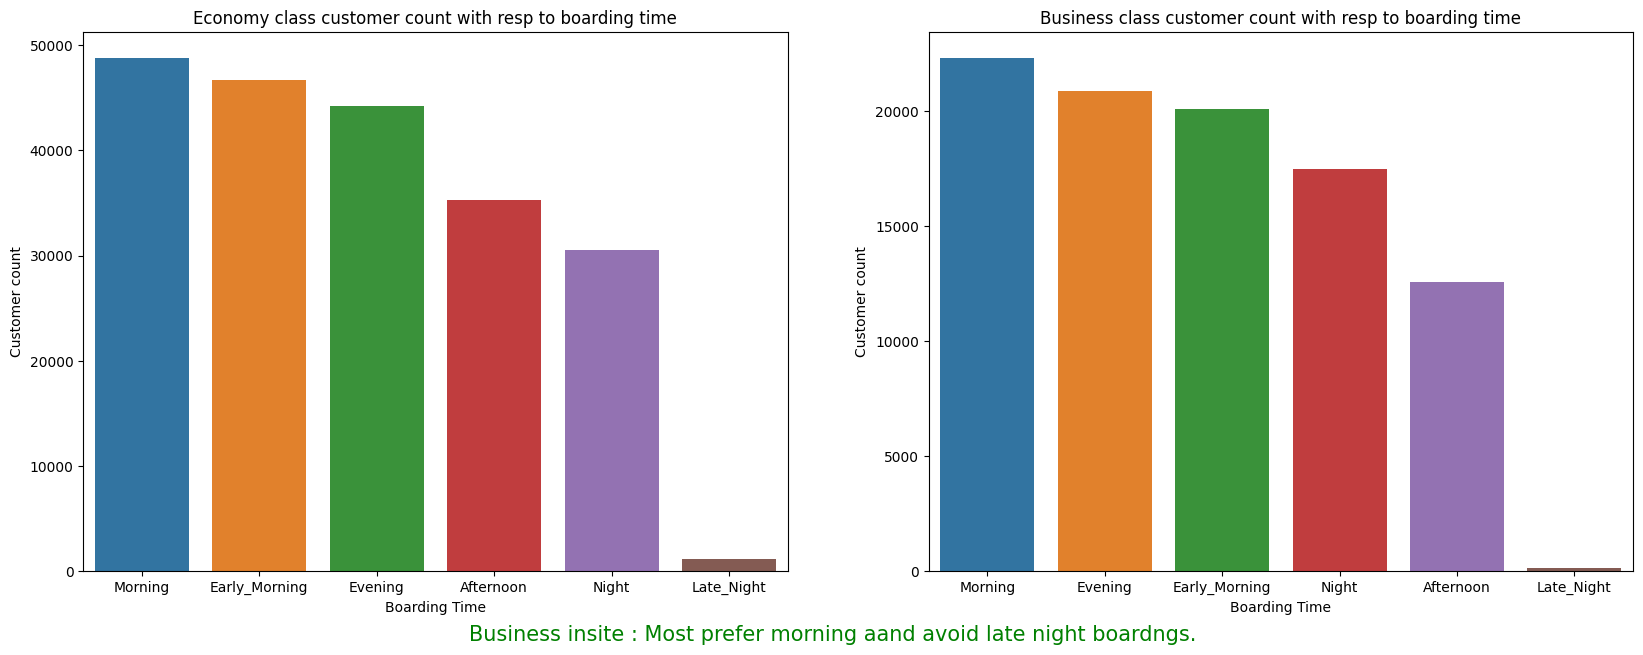

In [19]:
plt.figure(figsize = (20, 7))

plt.subplot(1, 2, 1)
sns.barplot(x = data[data["class"] == "Economy"]["departure_time"].value_counts().index, y = data[data["class"] == "Economy"]["departure_time"].value_counts().tolist())
plt.xlabel("Boarding Time")
plt.ylabel("Customer count")
plt.title("Economy class customer count with resp to boarding time")

plt.subplot(1, 2, 2)
sns.barplot(x = data[data["class"] == "Business"]["departure_time"].value_counts().index, y = data[data["class"] == "Business"]["departure_time"].value_counts().tolist())
plt.xlabel("Boarding Time")
plt.ylabel("Customer count")
plt.title("Business class customer count with resp to boarding time")

plt.figtext(0.5, 0.01, "Business insite : Most prefer morning aand avoid late night boardngs.", ha="center", fontsize=15, color = "green")
plt.show()

**Difference between the average Economy and Business class tickets**

In [20]:
px.bar(x =data.groupby("class").mean()["price"].index, y = data.groupby("class").mean()["price"].tolist(), 
       title = "Average cost difference in business and economy class tickets in India", color = data.groupby("class").mean()["price"].index)

**Boarding Time vs Price**

In [21]:
data.groupby("departure_time").mean()["price"].sort_values(ascending = False)

departure_time
Night            23062.146808
Morning          21630.760254
Evening          21232.361894
Early_Morning    20370.676718
Afternoon        18179.203331
Late_Night        9295.299387
Name: price, dtype: float64

In [22]:
px.bar(x = data.groupby("departure_time").mean()["price"].sort_values(ascending = False).index, y = data.groupby("departure_time").mean()["price"].sort_values(ascending = False).tolist(), 
       title = "Average cost with respect to Boarding time", color = data.groupby("departure_time").mean()["price"].sort_values(ascending = False).index)

**Arrival time vs price**

In [23]:
data.groupby("arrival_time").mean()["price"].sort_values(ascending = False)

arrival_time
Evening          23044.371615
Morning          22231.076098
Night            21586.758341
Afternoon        18494.598993
Early_Morning    14993.139521
Late_Night       11284.906078
Name: price, dtype: float64

In [24]:
px.bar(x = data.groupby("arrival_time").mean()["price"].sort_values(ascending = False).index, y = data.groupby("arrival_time").mean()["price"].sort_values(ascending = False).tolist(), 
       title = "Average cost with respect to Arrival time", color = data.groupby("arrival_time").mean()["price"].sort_values(ascending = False).index)

**Stops vs price comparison**

In [25]:
data.groupby("stops").mean()["price"]

stops
one            22900.992482
two_or_more    14113.450775
zero            9375.938535
Name: price, dtype: float64

In [26]:
px.bar(x = data.groupby("stops").mean()["price"].index, y = data.groupby("stops").mean()["price"].tolist(), 
       title = "Average cost with respect to No of stops", color = data.groupby("stops").mean()["price"].index)

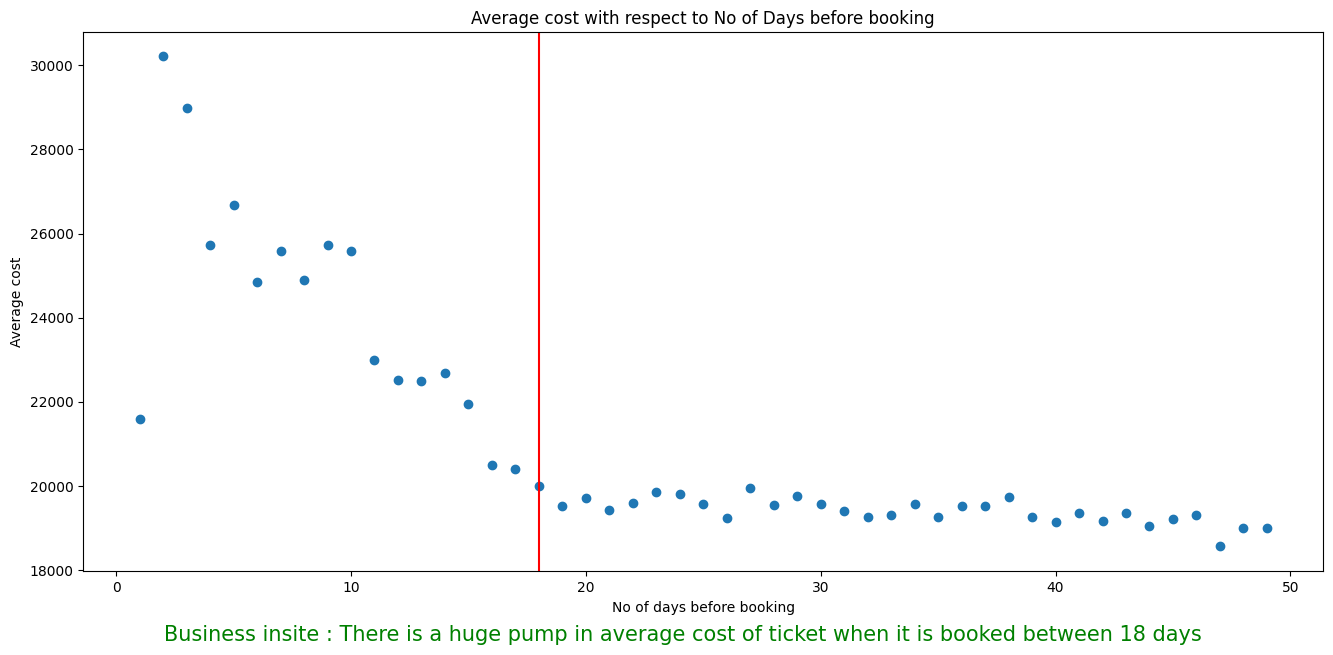

In [27]:
plt.figure(figsize = (16, 7))
plt.scatter(x = data.groupby("days_left").mean()["price"].index, y = data.groupby("days_left").mean()["price"].tolist())
plt.axvline(x = 18, color = 'r', label = 'axvline - full height')
plt.xlabel("No of days before booking")
plt.ylabel("Average cost")
plt.title("Average cost with respect to No of Days before booking")

plt.figtext(0.5, 0.01, "Business insite : There is a huge pump in average cost of ticket when it is booked between 18 days", ha="center", fontsize=15, color = "green")
plt.show()

# **Data Preperation Part**

**Finding Lat and lon for the Boarding and destination locations To find the distance between them**

In [28]:
lat_lon = {}
for i in data["destination_city"].unique():
  geolocator = Nominatim(user_agent="MyApp")
  location = geolocator.geocode(i)
  lt = str(location.latitude)
  ln = str(location.longitude)
  lat_lon[i] = lt + "-" + ln

In [29]:
df = data.copy()
df["Boarding Lat_Lon"] = df["source_city"].map(lat_lon)
df["destination Lat_Lon"] = df["destination_city"].map(lat_lon)

**Finding the distance between the locations**

In [30]:
def real_dist(x, y):
  from_ = tuple(map(float, x.split("-")))
  to = tuple(map(float, y.split("-")))
  return geodesic(from_, to).km

dist = []
for i in df.iloc[:, -2 : ].values:
  dist.append(real_dist(i[0], i[1]))

In [31]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Boarding Lat_Lon,destination Lat_Lon
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,28.6517178-77.2219388,19.0785451-72.878176
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,28.6517178-77.2219388,19.0785451-72.878176
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,28.6517178-77.2219388,19.0785451-72.878176
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,28.6517178-77.2219388,19.0785451-72.878176
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,28.6517178-77.2219388,19.0785451-72.878176


**I considered all catogerical features as Ordinal and dome ordinal encodig**

In [32]:
airline_encode = {i : j for i, j in zip(df.groupby("airline").mean()["price"].sort_values().index, range(len(df.groupby("airline").mean()["price"].sort_values().index)))}
departure_time_encode = {i : j for i, j in zip(df.groupby("departure_time").mean()["price"].sort_values().index, range(len(df.groupby("departure_time").mean()["price"].sort_values().index)))}
stops_encode = {i : j for i, j in zip(df.groupby("stops").mean()["price"].sort_values().index, range(len(df.groupby("stops").mean()["price"].sort_values().index)))}
arrival_time_encode = {i : j for i, j in zip(df.groupby("arrival_time").mean()["price"].sort_values().index, range(len(df.groupby("arrival_time").mean()["price"].sort_values().index)))}
class_encode = {i : j for i, j in zip(df.groupby("class").mean()["price"].sort_values().index, range(len(df.groupby("class").mean()["price"].sort_values().index)))}


In [33]:
df["airline"] = df["airline"].map(airline_encode)
df["departure_time"] = df["departure_time"].map(departure_time_encode)
df["arrival_time"] = df["arrival_time"].map(arrival_time_encode)
df["stops"] = df["stops"].map(stops_encode)
df["class"] = df["class"].map(class_encode)

df.insert(8, "Distance", dist)

In [34]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,Distance,duration,days_left,price,Boarding Lat_Lon,destination Lat_Lon
0,3,SG-8709,Delhi,3,0,3,Mumbai,0,1148.59381,2.17,1,5953,28.6517178-77.2219388,19.0785451-72.878176
1,3,SG-8157,Delhi,2,0,4,Mumbai,0,1148.59381,2.33,1,5953,28.6517178-77.2219388,19.0785451-72.878176
2,0,I5-764,Delhi,2,0,1,Mumbai,0,1148.59381,2.17,1,5956,28.6517178-77.2219388,19.0785451-72.878176
3,5,UK-995,Delhi,4,0,2,Mumbai,0,1148.59381,2.25,1,5955,28.6517178-77.2219388,19.0785451-72.878176
4,5,UK-963,Delhi,4,0,4,Mumbai,0,1148.59381,2.33,1,5955,28.6517178-77.2219388,19.0785451-72.878176


**Distribution of Price and Distance**

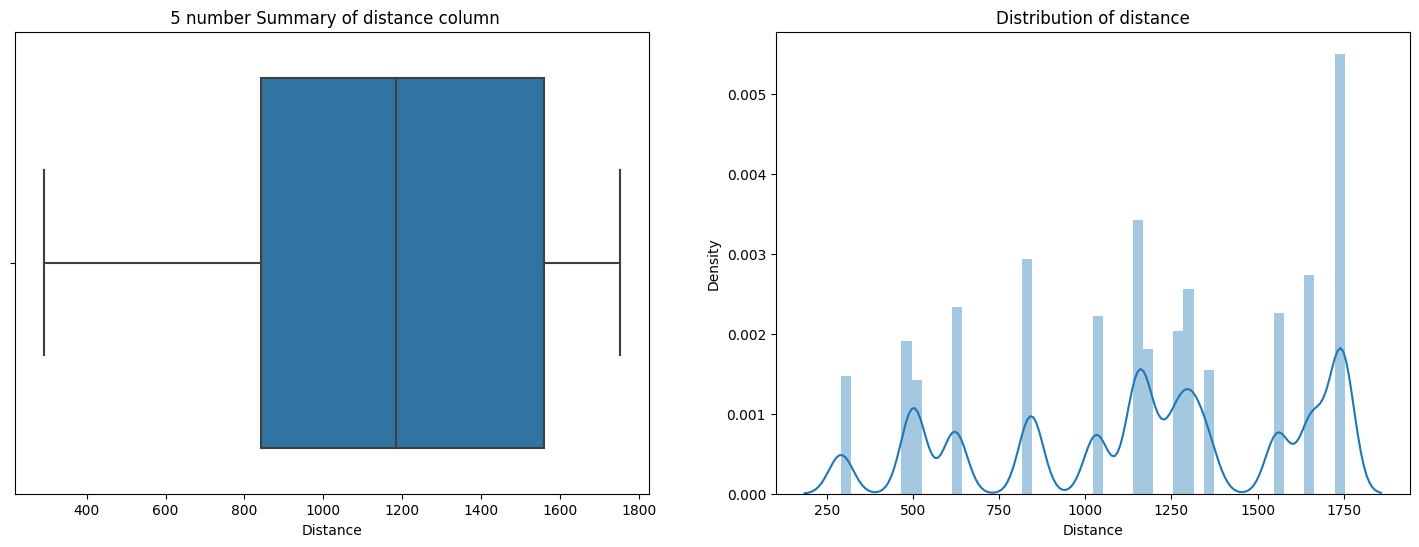

In [35]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x = df["Distance"])
plt.title(" 5 number Summary of distance column")
plt.subplot(1, 2, 2)
sns.distplot(df["Distance"])
plt.title("Distribution of distance")
plt.show()

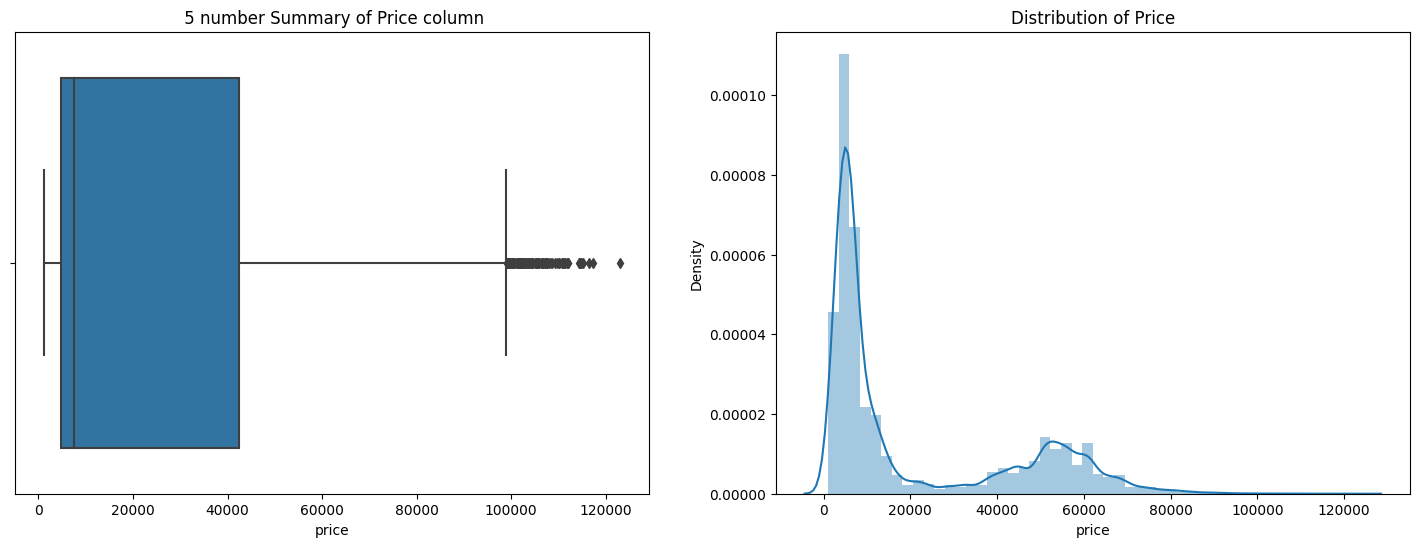

In [36]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x = df["price"])
plt.title(" 5 number Summary of Price column")
plt.subplot(1, 2, 2)
sns.distplot(df["price"])
plt.title("Distribution of Price")
plt.show()

<Axes: >

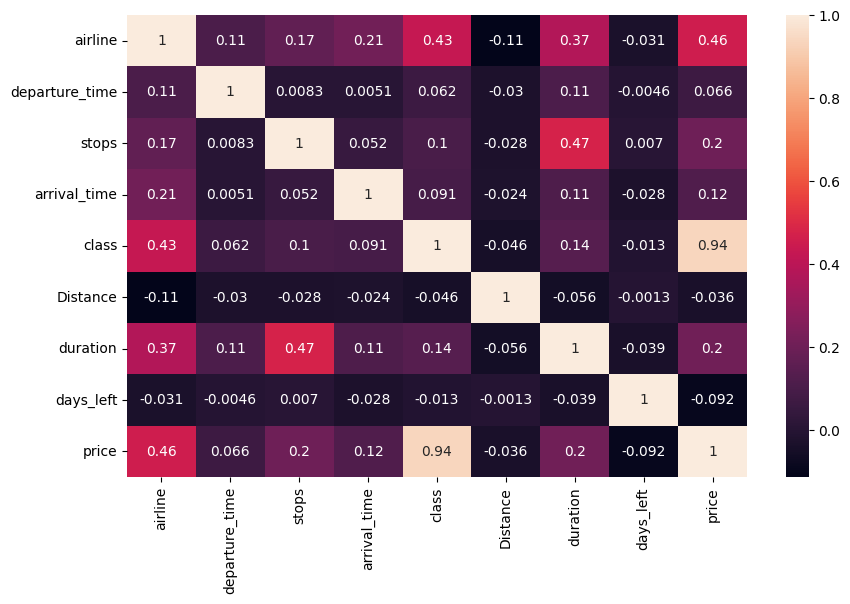

In [37]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)

# **Model Building Part**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


**Since I am not considering the locations both boarding and destination locations were droped**

As the dataset contains only limited locations the model is built based on the distance between the locations of the boarding and destination location to make the model more generallized to other locations.

Distance between the locations were found using geopy package - (Air distance)

In [49]:
df_1 = df.copy()
df_1 = df_1.sample(frac = 1)

In [50]:
X = df_1.drop(["flight", "source_city", "destination_city","duration", "price", "Boarding Lat_Lon", "destination Lat_Lon"], axis = 1)
y = df_1["price"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# **Random Forest Regressor**

In [52]:
rf = RandomForestRegressor( criterion='squared_error')
rf.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
rf.score(X_train, y_train)

0.9772722196638278

In [54]:
y_pred_rf = rf.predict(X_test)

In [55]:
rf.score(X_test, y_test)

0.9591793803755545

In [56]:
r2_score(y_test, y_pred_rf)

0.9591793803755545

In [57]:
mean_absolute_error(y_true=y_test,y_pred=y_pred_rf)

2340.945439620586

In [58]:
scores = cross_val_score(rf, X, y, cv=7, scoring='r2') 

In [59]:
scores, np.mean(scores)

(array([0.95980338, 0.96039681, 0.95866283, 0.95983396, 0.95829307,
        0.95923924, 0.95876925]),
 0.9592855067384696)

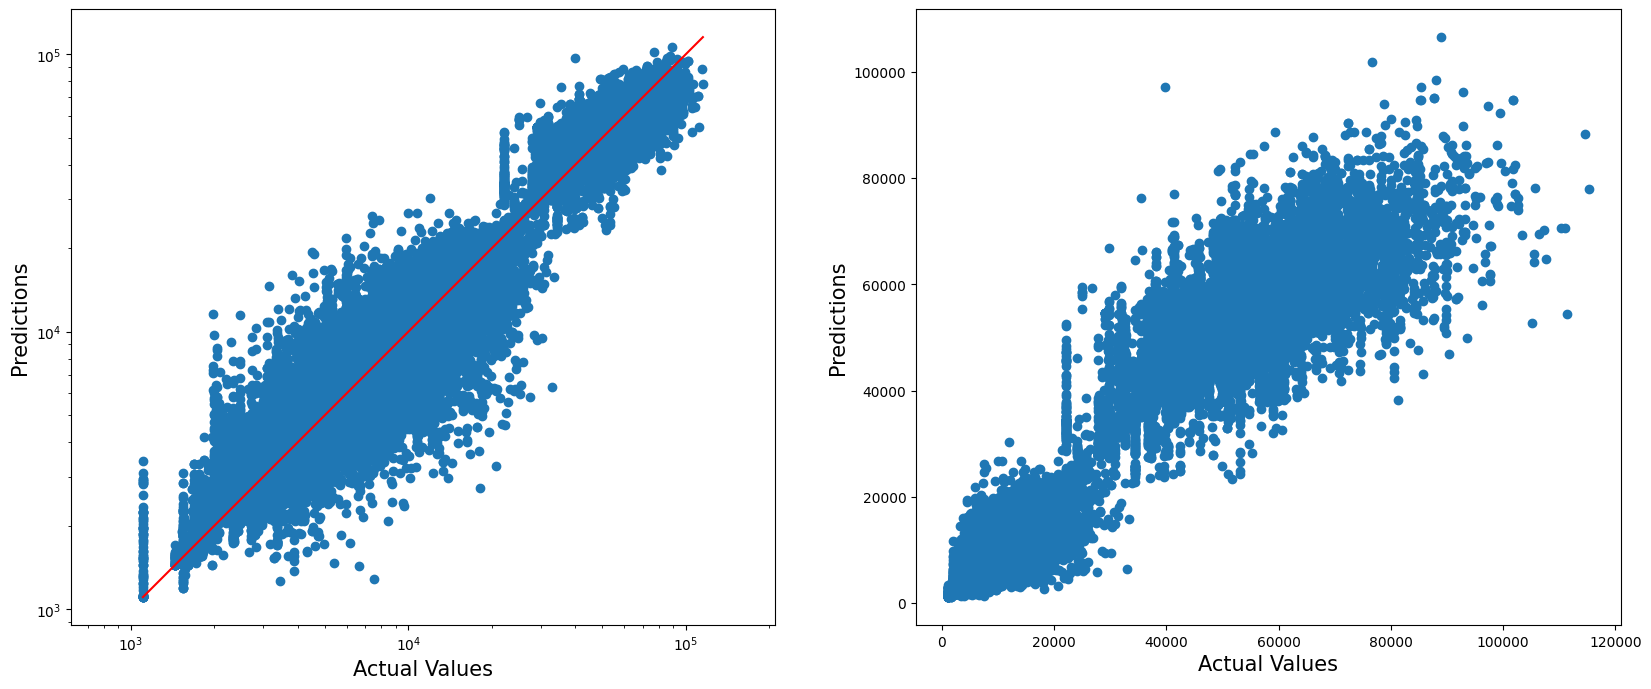

In [60]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_rf), max(y_test))
p2 = min(min(y_pred_rf), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()


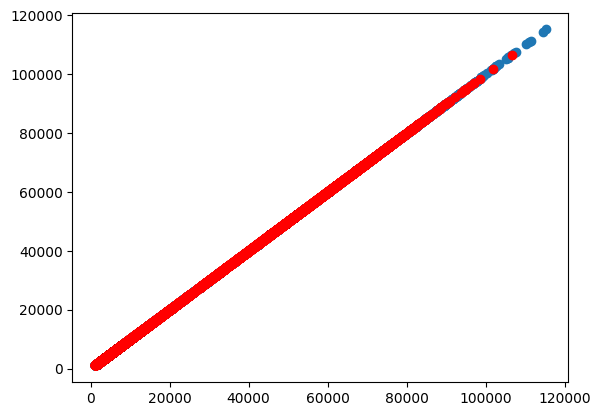

In [137]:
plt.scatter(y_test, y_test)
plt.scatter(y_pred_rf, y_pred_rf, color = "r")

# **XGB regressor**

In [69]:
xgb = XGBRegressor(n_jobs=5,learning_rate=0.06,max_depth=10)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=5, num_parallel_tree=None, predictor=None,
             random_state=None, ...)

In [62]:
xgb.score(X_train, y_train)

0.9695408294150485

In [63]:
y_pred_xgb = xgb.predict(X_test)

In [64]:
xgb.score(X_test, y_test)

0.9672602634689936

In [65]:
r2_score(y_test, y_pred_xgb)

0.9672602634689936

In [66]:
mean_absolute_error(y_true=y_test,y_pred=y_pred_xgb)

2188.435237364721

In [67]:
cv_xgb = cross_val_score(xgb, X, y, cv=7, scoring = "r2")
cv_xgb, np.mean(cv_xgb)

(array([0.96711661, 0.96894306, 0.96694541, 0.96766735, 0.96693584,
        0.96745467, 0.96706   ]),
 0.9674461324644469)

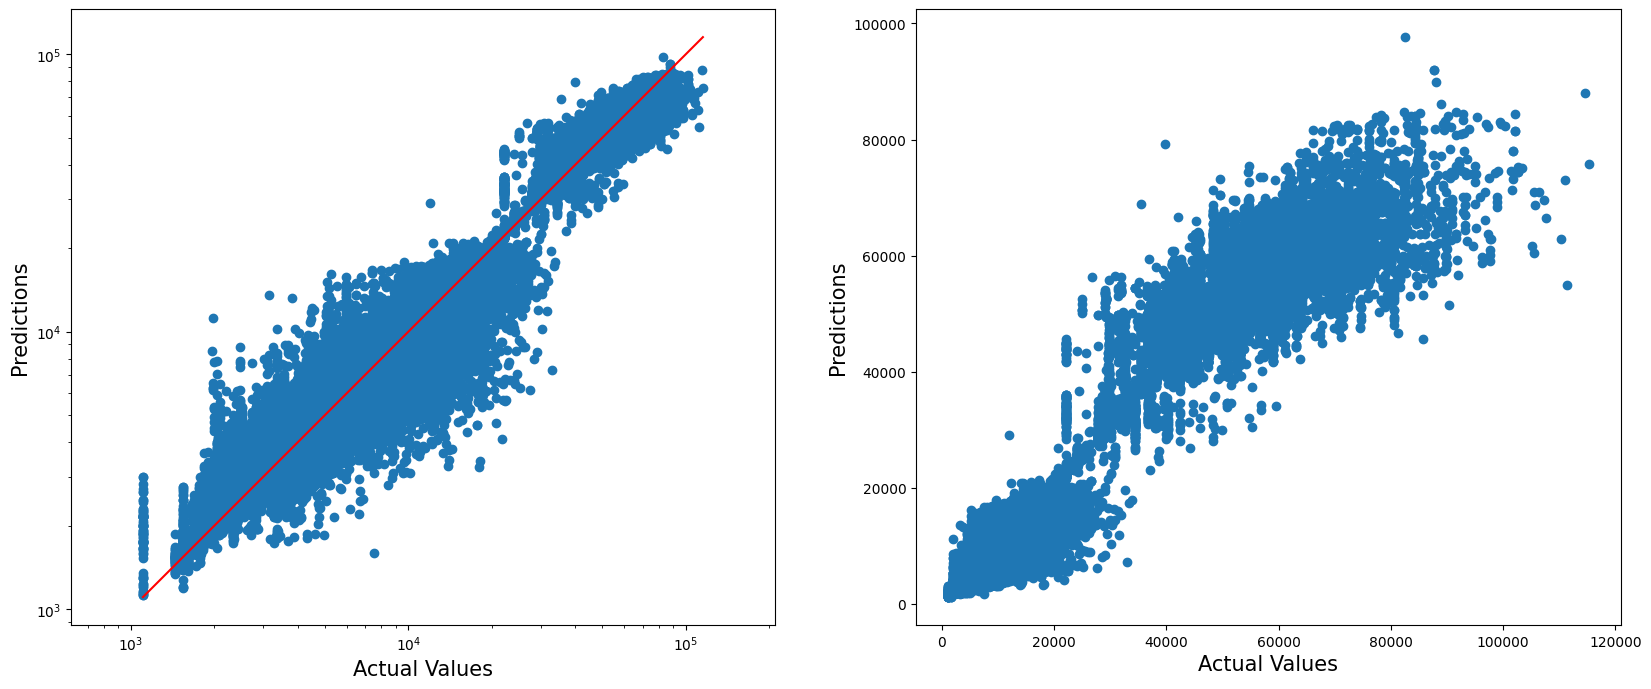

In [68]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_xgb)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_xgb), max(y_test))
p2 = min(min(y_pred_xgb), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb)
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.show()


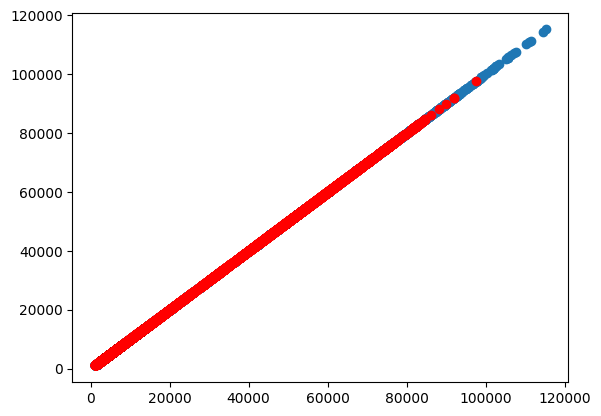

In [136]:
plt.scatter(y_test, y_test)
plt.scatter(y_pred_xgb, y_pred_xgb, color = "r")

**Pickling the best model for further usage**

In [70]:
import pickle
filename = "XGB_model"
pickle.dump(xgb, open(filename, "wb"))

# **Recommendation System Web app**

In [71]:
#Importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#preparing  data
data = pd.read_csv("https://github.com/TamizharasanG/Travel-and-Tourism-Clarity-TTS/blob/main/Data%20Folder/Indian_Tourism_custamized.csv?raw=true")

data.dropna(axis = 0, inplace = True)
data.drop(["Unnamed: 0"], axis = 1, inplace = True)
data = data.reset_index(drop=True)

#Since some names are with spaces in front of them strip is used
data["State"] = data["State"].apply(lambda x : x.strip())
data["Place"] = data["Place"].apply(lambda x : x.strip())

considered_features = ["State", "City", "Place", "Rating", "Short crisp"]

#forming vector
combined_vector = data["State"] + " "+ data["City"] + " " + data["Place"] + " "+ str(data["Rating"]) + " " + data["Short crisp"]

vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_vector)

# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

def recommend_places(place_name, state_name, limit):
  try:
    list_of_all_places = data['Place'].tolist()
    find_close_match = difflib.get_close_matches(place_name, list_of_all_places)
    close_match = find_close_match[0]
    index_of_the_place = data[data["Place"] == close_match].index.values[0]
    similarity_score = list(enumerate(similarity[index_of_the_place]))
    sorted_similar_places = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

    i = 1
    rec_places = []
    for place in sorted_similar_places:
      index = place[0]
      title_from_index = data[data.index==index]['Place'].values[0]
      if (i < 100):
        rec_places.append(title_from_index)
        i+=1

    df_new = data[data["Place"] == rec_places[0]]
    for i in rec_places[1:]:
      df_n = data[data["Place"] == i]
      df_new = pd.concat([df_new, df_n], axis = 0, ignore_index = True)

    if state_name == "All States": 
      df_return =  df_new.iloc[:limit+1, :5]
      if df_return.shape[0] > 0:
        return df_return
      elif df_return.shape[0] == 0:
        return "Sorry !!! No Such Data Found Try Other place !!!"
    elif state_name != "All States":
      df_return =  df_new[df_new["State"] == state_name].iloc[:limit+1, :5]
      if df_return.shape[0] > 0:
        return df_return
      elif df_return.shape[0] == 0:
        return f"Sorry !!! No Such Data Found in {state_name} .Try with All States to find match !!!" 

  except IndexError:
    return "Sorry !!! No Such Data Found Try Other place !!!"

# **Flight Price Prediction Web app building using Streamlit**

In [72]:
!pip install streamlit -q
!pip install pyngrok
!pip install streamlit-lottie
!pip install pyngrok==4.1.1
!pip install streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19879 sha256=3b5c2c218e19cf1c9861c61e56e4cc3b808780ed213d5a0ce481bdf8de60861a
  Stored in directory: /root/.cache/pip/wheels/31/49/9c/44b13823eb256a3b4dff34b972f7a3c7d9910bfef269e59bd7

In [73]:
!ngrok authtoken 2Op6KxeISOnrpDsw1Evp0nuqsQo_3vNvhKSLokNmWSvRXWbMg

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [74]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -qq ngrok-stable-linux-amd64.zip

--2023-04-25 05:19:39--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  8.52MB/s    in 1.6s    

2023-04-25 05:19:41 (8.52 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [75]:
%%writefile variable.py
import requests
import json


#All domestric and International airports in India
airport_available_cities_in_india = ["Mumbai", "Bangalore", "Chennai", "Kolkata", "Lucknow", "Amritsar", "Visakhapatnam", "Kannur", "Surat","Indore", "Kochi", "Ahmedabad", "Delhi", "Goa", "Pune", "Thiruvananthapuram", "Coimbatore","Calicut", "Bhubaneswar",
"Guwahati", "Varanasi", "Hyderabad", "Tiruchirappalli", "Nagpur","Srinagar","Imphal", "Jaipur", "Madurai", "Siliguri", "Patna", "Mangalore", "Chandigarh","Port Blair", "Kadapa", "Vijayawada", "Rajahmundry", "Tirupati", "Pasighat", "Gaya", "Ambikapur","Bilaspur",
"Raipur", "Diu", "New Delhi", "Dibrugarh", "Jorhat", "North Lakhimpur", "Tezpur", "Silchar","Vadodara", "BHUJ", "Kandla", "Jamnagar", "Porbandar", "Rajkot", "Bhavnagar", "Karnal", "Hisar", "Kangra","Kullu", "Shimla", "Jammu", "Bokaro", "Jamshedpur", "Ranchi",
"Bellary", "Belgaum", "Mysore", "Kalaburagi", "Hubli", "Kollam","Agatti", "Khajuraho", "Satna", "Jabalpur", "Bhopal", "Gwalior", "Indore", "Shirdi", "Nashik", "Yavatmal", "Nanded", "Kolhapur""Aurangabad", "Solapur", "Jalgaon", "Akola", "Shillong", "Aizawl",
"Dimapur", "Jharsuguda", "Jeypore", "Pondicherry","Bathinda", "Pathankot", "Ludhiana", "Patiala", "Jalandhar", "Bikaner", "Kota", "Ajmer", "Jodhpur", "Udaipur", "Jaisalmer","Gangtok", "Thoothukudi", "Salem", "Agartala", "Kanpur", "Ghaziabad", "Agra", "Gorakhpur",
"Allahabad", "Dehradun", "Pithoragarh","Pantnagar", "Balurghat", "Asansol", "Behala	", "Cooch Behar", "Panagarh"]

airport_coordinates = {'Mumbai': [19.0785451, 72.878176],'Bangalore': [12.9767936, 77.590082],'Chennai': [13.0836939, 80.270186],'Kolkata': [22.5726459, 88.3638953],'Lucknow': [26.8381, 80.9346001],'Amritsar': [31.6343083, 74.8736788],'Visakhapatnam': [17.7231276, 83.3012842],
 'Kannur': [11.8763836, 75.3737973],'Surat': [45.9383, 3.2553],'Indore': [22.7203616, 75.8681996],'Kochi': [9.9674277, 76.2454436],'Ahmedabad': [23.0216238, 72.5797068],'Delhi': [28.6517178, 77.2219388],'Goa': [15.3004543, 74.0855134],'Pune': [18.521428, 73.8544541],
 'Thiruvananthapuram': [8.4882267, 76.947551],'Coimbatore': [11.0018115, 76.9628425],'Calicut': [11.2450558, 75.7754716],'Bhubaneswar': [20.2602964, 85.8394521],'Guwahati': [26.1805978, 91.753943],'Varanasi': [25.3356491, 83.0076292],'Hyderabad': [17.360589, 78.4740613],
 'Tiruchirappalli': [10.804973, 78.6870296],'Nagpur': [21.1498134, 79.0820556],'Srinagar': [34.0747444, 74.8204443],'Imphal': [24.7991162, 93.9364419],'Jaipur': [26.9154576, 75.8189817],'Madurai': [9.9261153, 78.1140983],'Siliguri': [26.7164127, 88.4309916],
 'Patna': [25.6093239, 85.1235252],'Mangalore': [12.8698101, 74.8430082],'Chandigarh': [30.72984395, 76.78414567016054],'Port Blair': [11.6645348, 92.7390448],'Kadapa': [14.4752936, 78.8216861],'Vijayawada': [16.5087573, 80.6185089],'Rajahmundry': [17.0050454, 81.7804732],
 'Tirupati': [13.77928955, 79.83512262283737],'Pasighat': [28.0589676, 95.3324944],'Gaya': [24.7964355, 85.0079563],'Ambikapur': [23.1226343, 83.1981886],'Bilaspur': [28.8680526, 79.29838501460121],'Raipur': [21.2380912, 81.6336993],'Diu': [20.718174949999998, 70.93238341010638],
 'New Delhi': [28.6138954, 77.2090057],'Dibrugarh': [27.4844597, 94.9019447],'Jorhat': [26.7577925, 94.2079645],'North Lakhimpur': [27.160901099999997, 94.16266801115614],'Tezpur': [26.61695705, 92.76500717365028],'Silchar': [24.817861100000002, 92.75622075294373],
 'Vadodara': [22.2973142, 73.1942567],'BHUJ': [23.2472446, 69.668339],'Kandla': [58.369728499999994, 22.29574379685654],'Jamnagar': [22.4732415, 70.0552102],'Porbandar': [21.6409, 69.611],'Rajkot': [22.3053263, 70.8028377],'Bhavnagar': [21.7718836, 72.1416449],
 'Karnal': [29.6803266, 76.9896254],'Hisar': [29.080640950000003, 75.788754109493],'Kangra': [32.166667, 76.25],'Kullu': [32.00186325, 77.37899639741332],'Shimla': [31.1041526, 77.1709729],'Jammu': [32.7185614, 74.8580917],'Bokaro': [23.699127949999998, 85.99106894165021],
 'Jamshedpur': [22.8015194, 86.2029579],'Ranchi': [23.3700501, 85.3250387],'Bellary': [15.1433952, 76.9193876],'Belgaum': [15.8572666, 74.5069343],'Mysore': [12.3051828, 76.6553609],'Kalaburagi': [17.166667, 77.083333],'Hubli': [15.3518378, 75.1379848],
 'Kollam': [8.8879509, 76.5955013],'Agatti': [10.9478981, 72.3177271359032],'Khajuraho': [24.8515132, 79.9259786],'Satna': [24.5, 81.0],'Jabalpur': [23.1608938, 79.9497702],'Bhopal': [23.2584857, 77.401989],'Gwalior': [26.2037247, 78.1573628],'Shirdi': [19.7668121, 74.4754386],
 'Nashik': [20.0112475, 73.7902364],'Yavatmal': [20.325703750000002, 78.11691396684715],'Nanded': [19.09400875, 77.48319215130235],'Kolhapur': [16.7028412, 74.2405329],'Aurangabad': [24.786306, 84.41448983395554],'Solapur': [17.84990665, 75.27632027348457],
 'Jalgaon': [20.84288265, 75.52612463784979],'Akola': [20.76181225, 77.1921156663574],'Shillong': [25.5760446, 91.8825282],'Aizawl': [23.7435236, 92.7382905],'Dimapur': [25.911744, 93.721703],'Jharsuguda': [21.87705125, 84.00905063735019],'Jeypore': [18.89891745, 82.5590760883135],
 'Pondicherry': [10.91564885, 79.80694879844232],'Bathinda': [30.17911535, 75.04710156312628],'Pathankot': [32.2692452, 75.6528858],'Ludhiana': [30.9090157, 75.851601],'Patiala': [30.2090874, 76.3398720856221],'Jalandhar': [31.29201065, 75.56805772253911],
 'Bikaner': [28.0159286, 73.3171367],'Kota': [25.1737019, 75.8574194],'Ajmer': [26.4691, 74.639],'Jodhpur': [26.2967719, 73.0351433],'Udaipur': [24.578721, 73.6862571],'Jaisalmer': [26.921761, 70.9191144],'Gangtok': [27.325756900000002, 88.69827694810172],
 'Thoothukudi': [8.8052602, 78.1452745],'Salem': [44.9391565, -123.033121],'Agartala': [23.8312377, 91.2823821],'Kanpur': [26.4609135, 80.3217588],'Ghaziabad': [28.6711527, 77.4120356],'Agra': [27.1752554, 78.0098161],'Gorakhpur': [26.6711433, 83.36457243864551],
 'Allahabad': [25.4381302, 81.8338005],'Dehradun': [30.3255646, 78.0436813],'Pithoragarh': [29.585871, 80.215167],'Pantnagar': [29.028405, 79.4832094],'Balurghat': [25.2634866, 88.78900293567636],'Asansol': [23.6871297, 86.9746587],'Behala\t': [22.501572, 88.3209435],
 'Cooch Behar': [26.3223696, 89.4592445],'Panagarh': [23.446967700000002, 87.45468693032689]}

airline_encode = {'AirAsia': 0,'Indigo': 1,'GO_FIRST': 2,'SpiceJet': 3,'Air_India': 4,'Vistara': 5}

departure_time_encode = {'Late_Night': 0,'Afternoon': 1,'Early_Morning': 2,'Evening': 3,'Morning': 4,'Night': 5}

stops_encode = {'zero': 0, 'two_or_more': 1, 'one': 2}

arrival_time_encode = {'Late_Night': 0,'Early_Morning': 1,'Afternoon': 2,'Night': 3,'Morning': 4,'Evening': 5}

class_encode = {'Economy': 0, 'Business': 1}

def load_lottieurl(url):
  r = requests.get(url)
  if r.status_code != 200:
    return None
  return r.json()

Writing variable.py


In [76]:
%%writefile function.py
#Importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
import streamlit as st
from streamlit_lottie import st_lottie

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#preparing  data
data = pd.read_csv("https://github.com/TamizharasanG/Travel-and-Tourism-Clarity-TTS/blob/main/Data%20Folder/Indian_Tourism_custamized.csv?raw=true")

data.dropna(axis = 0, inplace = True)
data.drop(["Unnamed: 0"], axis = 1, inplace = True)
data = data.reset_index(drop=True)

#Since some names are with spaces in front of them strip is used
data["State"] = data["State"].apply(lambda x : x.strip())
data["Place"] = data["Place"].apply(lambda x : x.strip())

considered_features = ["State", "City", "Place", "Rating", "Short crisp"]

#forming vector
combined_vector = data["State"] + " "+ data["City"] + " " + data["Place"] + " "+ str(data["Rating"]) + " " + data["Short crisp"]

vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_vector)

# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

def recommend_places(place_name, state_name, limit):
  try:
    list_of_all_places = data['Place'].tolist()
    find_close_match = difflib.get_close_matches(place_name, list_of_all_places)
    close_match = find_close_match[0]
    index_of_the_place = data[data["Place"] == close_match].index.values[0]
    similarity_score = list(enumerate(similarity[index_of_the_place]))
    sorted_similar_places = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

    i = 1
    rec_places = []
    for place in sorted_similar_places:
      index = place[0]
      title_from_index = data[data.index==index]['Place'].values[0]
      if (i < 100):
        rec_places.append(title_from_index)
        i+=1

    df_new = data[data["Place"] == rec_places[0]]
    for i in rec_places[1:]:
      df_n = data[data["Place"] == i]
      df_new = pd.concat([df_new, df_n], axis = 0, ignore_index = True)

    if state_name == "All States": 
      df_return =  df_new.iloc[:limit+1, :5]
      if df_return.shape[0] > 0:
        return df_return
      elif df_return.shape[0] == 0:
        return "Sorry for the inconvenience happned !!! App is in the developement stage. We are improving day by day !!!"
    elif state_name != "All States":
      df_return =  df_new[df_new["State"] == state_name].iloc[:limit+1, :5]
      if df_return.shape[0] > 0:
        return df_return
      elif df_return.shape[0] == 0:
        return f"Sorry for the inconvenience happned !!! No Such Data Found in {state_name} .We are improving day by day. Try with All States to find match !!!" 

  except IndexError:
    return "Sorry for the inconvenience happned !!! App is in the developement stage. We are improving day by day !!!"

Writing function.py


In [131]:
%%writefile predict.py
import pickle
import streamlit as st
import pandas as pd
import numpy as np
import requests
import json
from streamlit_lottie import st_lottie
from streamlit_option_menu import option_menu
import geopy
from geopy.distance import geodesic
import difflib
from function import recommend_places, data
from variable import airport_available_cities_in_india, airport_coordinates, airline_encode, departure_time_encode, stops_encode, arrival_time_encode, class_encode, load_lottieurl

loaded_model = pickle.load(open("XGB_model", "rb"))


st.set_page_config(page_title= "Travel Assistant web app | Tamizharasan Govindasamy",
                   layout= "wide",
                   initial_sidebar_state= "expanded",
                   menu_items={'About': """# This dashboard app is created by *Tamizharasan Govindasamy*!
                                        Data is collected from Kaggle"""})



with st.sidebar:
    selected = option_menu("Menu", ["Home","Flight Price Predictor","Tour Place Recommender", "Tour place explorer"], 
                icons=["house", "airplane", "geo-fill", "geo-alt-fill"],
                menu_icon= '<i class="bi bi-airplane-engines-fill"></i>',
                default_index=0,
                styles={"nav-link": {"font-size": "12px", "text-align": "left", "margin": "-1px", "--hover-color": "#56EC5D"},
                        "nav-link-selected": {"background-color": "#FB1A03"}})

st.sidebar.header(":wave: :red[*Hello! Welcome to Your Travel Assistant App*]")                       

if selected == "Home":
  st.markdown("<h1 style='text-align: center; color: red;'>Your Travel Assistant</h1>", unsafe_allow_html=True)
  st.markdown("<h3 style='text-align: center; color: '#2DB5A7';'>Your one to go app for all your travel needs</h1>", unsafe_allow_html=True)
  url_head = "https://assets4.lottiefiles.com/packages/lf20_ccdz2hzz.json"
  lottie_home_result = load_lottieurl(url_head)
  st_lottie(
    lottie_home_result,
    speed = 1,
    reverse = False,
    loop = True,
    quality = "high",
    #renderer = "svg",
    height = 400,
    width = None,
    key = "header"
    )
  st.markdown("<h6 style='text-align: center; color: #55F395;'>Usage                 :   Flight Price prediction, Tourist place recomendation as per your intrest, Tour place explorer </h6>", unsafe_allow_html=True)
  st.markdown("<h6 style='text-align: center; color: violet;'>Technologies used     :   Python, Pandas, Sklearn, Streamlit, Ngrok </h6>", unsafe_allow_html=True)
  st.markdown("<h6 style='text-align: center; color: violet;'>Description           :   This is a user friendly web app used for the prediction of flight ticket price(Within India), Recommends similar tourist places as per your intrest, and used to explore the tourist places filtered by state and city  </h6>", unsafe_allow_html=True)


if selected == "Flight Price Predictor":
  home_url = "https://assets3.lottiefiles.com/packages/lf20_tVT3vG.json"  
  lottie_price_result = load_lottieurl(home_url)
  st_lottie(
    lottie_price_result,
    speed = 1,
    reverse = False,
    loop = True,
    quality = "high",
    #renderer = "svg",
    height = 200,
    width = None,
    key = "home_img"
    )
  st.markdown("<h1 style='text-align: center; color: red;'>Flight Price Predictor</h1>", unsafe_allow_html=True)

  col1, col2 = st.columns(2)
  all_city_data = airport_available_cities_in_india
  board = col1.selectbox("Select your Boarding point", airport_available_cities_in_india)

  updated_city = all_city_data.copy()
  updated_city.remove(board)
  dest = col2.selectbox("Select Your destination", updated_city)

  f_dist = lambda x, y : geodesic(tuple(x), tuple(y)).km
  dist = f_dist(airport_coordinates[board], airport_coordinates[dest])


  col3, col4 = st.columns(2)
  airline = col3.selectbox("Enter Your desired airline", list(airline_encode.keys()) )
  airline_encoded = airline_encode[airline]

  cls = col4.selectbox("Enter your prefered class", list(class_encode.keys()))
  cls_encoded = class_encode[cls]


  col5, col6 = st.columns(2)
  boarding_time = col5.selectbox("Enter your prefered boarding time", list(departure_time_encode.keys()))
  bt_encoded = departure_time_encode[boarding_time]

  arrival_time = col6.selectbox("Enter your prefered arrival time", list(arrival_time_encode.keys()) )
  at_encoded = arrival_time_encode[arrival_time]


  col7, col8 = st.columns(2)
  n_stop = col7.selectbox("Enter your prefered stops", list(stops_encode.keys()) )
  n_stop_encoded = stops_encode[n_stop]

  days = col8.number_input("Enter no of days for your boarding", 1, 50)

  if st.button("Predict"):
    url_predict = "https://assets4.lottiefiles.com/packages/lf20_0lvdwxbc.json"
    lottie_predict_result = load_lottieurl(url_predict)
    st_lottie(
      lottie_predict_result,
      speed = 1,
      reverse = False,
      loop = True,
      quality = "high",
      #renderer = "svg",
      height = 200,
      width = None,
      key = "predict"
    )
    user_data = [airline_encoded, bt_encoded,n_stop_encoded, at_encoded, cls_encoded, dist, days]
    inp_array = np.array([user_data])
    estimated_cost = loaded_model.predict(inp_array)
    st.success(f'Estimated cost for your travel would be around ₹ {str(int(round(estimated_cost[0], 0)))}')

if selected == "Tour Place Recommender":
  tour_url = "https://assets6.lottiefiles.com/packages/lf20_swnrn2oy.json"
  lottie_result = load_lottieurl(tour_url)
  st_lottie(
    lottie_result,
    speed = 1,
    reverse = False,
    loop = True,
    quality = "low",
    #renderer = "svg",
    height = 200,
    width = None,
    key = "recomend"
  ) 
  st.markdown("<h1 style='text-align: center; color: red;'>Tour Place Recommender</h1>", unsafe_allow_html=True)

  place_name = st.text_input('Enter you favourite vacation spot here, I will suggest you some similar places you may like: ')
  state_list = ['All States-15079','Maharashtra - 1954','Tamil Nadu - 1540','Karnataka - 1294','Kerala - 1150','Rajasthan - 931','Gujarat - 825','Uttar Pradesh - 763','West Bengal - 720','Madhya Pradesh - 580',
  'Himachal Pradesh - 486','Uttarakhand - 475','Delhi - 430','Andhra Pradesh - 391','Goa - 385','Telangana - 357','Odisha - 352','Punjab - 270','Bihar - 270','Haryana - 229','Jharkhand - 222','Jammu and Kashmir - 208',
  'Assam - 183','Chhattisgarh - 167','Sikkim - 113','Meghalaya - 113','Ladakh - 108','Arunachal Pradesh - 90','Andaman and Nicobar Islands - 79','Manipur - 70','Dadra and Nagar Haveli and Daman and Diu - 62',
  'Puducherry - 59','Chandigarh - 47','Tripura - 45','Nagaland - 42','Mizoram - 37','Gulf of Kutch - 23','Lakshadweep - 6']


  state_name_raw = st.selectbox("Select State", state_list)
  state_name = state_name_raw.split("-")[0].strip()
  limit = st.number_input('Pick a number', 1, 50)
  if st.button("Recomend"):
    out = recommend_places(place_name, state_name, limit)
    if type(out) == str:
      not_found_url = "https://assets7.lottiefiles.com/packages/lf20_EaOthPrBLy.json"
      lottie_no_result = load_lottieurl(not_found_url)
      st_lottie(
        lottie_no_result,
        speed = 1,
        reverse = False,
        loop = True,
        quality = "low",
        #renderer = "svg",
        height = 200,
        width = None,
        key = "not_found"
      ) 
      st.info(out)
    if type(out) != str:
      for i in range(out.shape[0]):
        state = out.iloc[i, -1]
        city = out.iloc[i, 0]
        place = out.iloc[i, 1]
        rating = out.iloc[i, 2]
        hashtags = ' '.join(["#"+i for i in out.iloc[i, 3].split()]) 
        st.success(f'''
        Place : {place}

        State : {state}  

        City : {city}

        Average Rating : {rating}

        Hashtags : {hashtags}
        ''')

if selected == "Tour place explorer":
  loc_url = "https://assets3.lottiefiles.com/packages/lf20_qiaji9QKYl.json"
  lottie_loc_result = load_lottieurl(loc_url)
  st_lottie(
    lottie_loc_result,
    speed = 1,
    reverse = False,
    loop = True,
    quality = "low",
    #renderer = "svg",
    height = 200,
    width = None,
    key = "not_found"
  )
  st.markdown("<h1 style='text-align: center; color: red;'>Tour Place Explorer</h1>", unsafe_allow_html=True)

  state_list = ['Maharashtra - 1954','Tamil Nadu - 1540','Karnataka - 1294','Kerala - 1150','Rajasthan - 931','Gujarat - 825','Uttar Pradesh - 763','West Bengal - 720','Madhya Pradesh - 580',
  'Himachal Pradesh - 486','Uttarakhand - 475','Delhi - 430','Andhra Pradesh - 391','Goa - 385','Telangana - 357','Odisha - 352','Punjab - 270','Bihar - 270','Haryana - 229','Jharkhand - 222','Jammu and Kashmir - 208',
  'Assam - 183','Chhattisgarh - 167','Sikkim - 113','Meghalaya - 113','Ladakh - 108','Arunachal Pradesh - 90','Andaman and Nicobar Islands - 79','Manipur - 70','Dadra and Nagar Haveli and Daman and Diu - 62',
  'Puducherry - 59','Chandigarh - 47','Tripura - 45','Nagaland - 42','Mizoram - 37','Gulf of Kutch - 23','Lakshadweep - 6']

  clo19, col20 = st.columns(2)
  st_name = col19.selectbox("Select State", state_list)
  st_name = st_name.split("-")[0].strip()

  data_1 = data.copy()
  cty_list = list(data_1[data_1["State"] == st_name]["City"].unique())
  cty_list.insert(0, "All Cities")
  cty_name = col20.selectbox("Select City",cty_list)

  if st.button("Find Places"):
    out_data = data[data["State"] == st_name]
    if cty_name == "All Cities":
      for i in range(out_data.shape[0]):
        state = out_data.iloc[i, -1]
        city = out_data.iloc[i, 0]
        place = out_data.iloc[i, 1]
        rating = out_data.iloc[i, 2]
        hashtags = ' '.join(["#"+i for i in out_data.iloc[i, 3].split()]) 
        st.success(f'''
        Place : {place}

        State : {state}  

        City : {city}

        Average Rating : {rating}

        Hashtags : {hashtags}
        ''')
    elif cty_name != "All Cities":
      out_data = out_data[out_data["City"] == cty_name]
      for i in range(out_data.shape[0]):
        state = out_data.iloc[i, -1]
        city = out_data.iloc[i, 0]
        place = out_data.iloc[i, 1]
        rating = out_data.iloc[i, 2]
        hashtags = ' '.join(["#"+i for i in out_data.iloc[i, 3].split()]) 
        st.success(f'''
        Place : {place}

        State : {state}  

        City : {city}

        Average Rating : {rating}

        Hashtags : {hashtags}
        ''')     

Overwriting predict.py


In [132]:
get_ipython().system_raw('./ngrok http 8501 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [ ]:
!streamlit run /content/predict.py